In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 1.0  3.5  318.3 ...  7.1  1.0  0.0]
 [ 1.0  9.5  1647.6 ...  5.7  1.0  0.0]
 [ 0.0  0.3  17.9 ...  5.1  0.9  0.0]
 ...
 [ 0.0  5.6  366.1 ...  2.4  1.0  0.0]
 [ 0.0  23.3  1534.5 ...  4.2  1.0  0.0]
 [ 1.0  1.7  205.5 ...  7.6  0.9  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 1.0  318.3  17.8 ...  0.3  7.1  0.0]
 [ 1.0  1647.6  40.6 ...  0.5  5.7  0.0]
 [ 0.0  17.9  4.2 ...  0.6  5.1  0.0]
 ...
 [ 0.0  366.1  19.1 ...  0.7  2.4  0.0]
 [ 0.0  1534.5  39.2 ...  0.5  4.2  0.0]
 [ 1.0  205.5  14.3 ...  0.3  7.6  0.0]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 2s 10ms/step - loss: 30.5956 - accuracy: 0.5505 - val_loss: 14.6994 - val_accuracy: 0.4991
Epoch 2/500
83/83 [==============================] - 0s 5ms/step - loss: 12.0538 - accuracy: 0.5258 - val_loss: 11.0533 - val_accuracy: 0.4805
Epoch 3/500
83/83 [==============================] - 0s 5ms/step - loss: 8.3244 - accuracy: 0.5144 - val_loss: 7.1083 - val_accuracy: 0.4823
Epoch 4/500
83/83 [==============================] - 0s 5ms/step - loss: 5.3321 - accuracy: 0.5330 - val_loss: 4.5767 - val_accuracy: 0.5044
Epoch 5/500
83/83 [==============================] - 0s 5ms/step - loss: 3.2187 - accuracy: 0.5444 - val_loss: 2.8985 - val_accuracy: 0.5505
Epoch 6/500
83/83 [==============================] - 0s 5ms/step - loss: 2.1058 - accuracy: 0.5475 - val_loss: 1.9775 - val_accuracy: 0.5807
Epoch 7/500
83/83 [==============================] - 0s 5ms/step - loss: 1.5130 - accuracy: 0.5809 - val_loss: 1.3788 - val_accuracy: 0.5204
Epoch 8/

Epoch 59/500
83/83 [==============================] - 0s 5ms/step - loss: 0.2209 - accuracy: 0.9127 - val_loss: 0.1724 - val_accuracy: 0.9211
Epoch 60/500
83/83 [==============================] - 0s 5ms/step - loss: 0.2411 - accuracy: 0.9119 - val_loss: 0.2009 - val_accuracy: 0.9220
Epoch 61/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.9153 - val_loss: 0.1491 - val_accuracy: 0.9353
Epoch 62/500
83/83 [==============================] - 0s 5ms/step - loss: 0.2241 - accuracy: 0.9263 - val_loss: 0.2488 - val_accuracy: 0.9087
Epoch 63/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.9199 - val_loss: 0.6766 - val_accuracy: 0.7704
Epoch 64/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2240 - accuracy: 0.9176 - val_loss: 0.1485 - val_accuracy: 0.9450
Epoch 65/500
83/83 [==============================] - 0s 5ms/step - loss: 0.2279 - accuracy: 0.9203 - val_loss: 0.1576 - val_accuracy: 0.9255
Epoch 

83/83 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.9355 - val_loss: 0.2208 - val_accuracy: 0.9184
Epoch 117/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 0.9347 - val_loss: 0.1180 - val_accuracy: 0.9495
Epoch 118/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1640 - accuracy: 0.9358 - val_loss: 0.1013 - val_accuracy: 0.9637
Epoch 119/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1647 - accuracy: 0.9339 - val_loss: 0.1655 - val_accuracy: 0.9282
Epoch 120/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1639 - accuracy: 0.9393 - val_loss: 0.1185 - val_accuracy: 0.9583
Epoch 121/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1595 - accuracy: 0.9351 - val_loss: 0.1652 - val_accuracy: 0.9291
Epoch 122/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1613 - accuracy: 0.9366 - val_loss: 0.2118 - val_accuracy: 0.9060
Epoch 123/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1421 - accuracy: 0.9453 - val_loss: 0.1509 - val_accuracy: 0.9362
Epoch 174/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1580 - accuracy: 0.9332 - val_loss: 0.1041 - val_accuracy: 0.9548
Epoch 175/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1359 - accuracy: 0.9484 - val_loss: 0.2441 - val_accuracy: 0.9113
Epoch 176/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1471 - accuracy: 0.9487 - val_loss: 0.0875 - val_accuracy: 0.9654
Epoch 177/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1382 - accuracy: 0.9453 - val_loss: 0.1064 - val_accuracy: 0.9574
Epoch 178/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1401 - accuracy: 0.9453 - val_loss: 0.1040 - val_accuracy: 0.9574
Epoch 179/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1395 - accuracy: 0.9468 - val_loss: 0.2877 - val_accuracy: 0.8980
Epoch 180/500

83/83 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9548 - val_loss: 0.1008 - val_accuracy: 0.9628
Epoch 231/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1249 - accuracy: 0.9514 - val_loss: 0.1555 - val_accuracy: 0.9406
Epoch 232/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1303 - accuracy: 0.9529 - val_loss: 0.3592 - val_accuracy: 0.8759
Epoch 233/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1190 - accuracy: 0.9548 - val_loss: 0.0710 - val_accuracy: 0.9787
Epoch 234/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9510 - val_loss: 0.4831 - val_accuracy: 0.8431
Epoch 235/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1220 - accuracy: 0.9499 - val_loss: 0.1300 - val_accuracy: 0.9486
Epoch 236/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.9503 - val_loss: 0.0992 - val_accuracy: 0.9592
Epoch 237/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1158 - accuracy: 0.9582 - val_loss: 0.1104 - val_accuracy: 0.9566
Epoch 288/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1199 - accuracy: 0.9537 - val_loss: 0.0638 - val_accuracy: 0.9823
Epoch 289/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1190 - accuracy: 0.9601 - val_loss: 0.0601 - val_accuracy: 0.9840
Epoch 290/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1240 - accuracy: 0.9537 - val_loss: 0.1040 - val_accuracy: 0.9583
Epoch 291/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1110 - accuracy: 0.9617 - val_loss: 0.3119 - val_accuracy: 0.8989
Epoch 292/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1220 - accuracy: 0.9548 - val_loss: 0.0595 - val_accuracy: 0.9840
Epoch 293/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1173 - accuracy: 0.9552 - val_loss: 0.0653 - val_accuracy: 0.9796
Epoch 294/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1059 - accuracy: 0.9639 - val_loss: 0.4745 - val_accuracy: 0.8528
Epoch 345/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1063 - accuracy: 0.9647 - val_loss: 0.3446 - val_accuracy: 0.8954
Epoch 346/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1064 - accuracy: 0.9655 - val_loss: 0.0585 - val_accuracy: 0.9849
Epoch 347/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1103 - accuracy: 0.9601 - val_loss: 0.1830 - val_accuracy: 0.9353
Epoch 348/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1084 - accuracy: 0.9632 - val_loss: 0.0678 - val_accuracy: 0.9787
Epoch 349/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1003 - accuracy: 0.9643 - val_loss: 0.0829 - val_accuracy: 0.9734
Epoch 350/500
83/83 [==============================] - 0s 6ms/step - loss: 0.1198 - accuracy: 0.9571 - val_loss: 0.0542 - val_accuracy: 0.9876
Epoch 351/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1025 - accuracy: 0.9617 - val_loss: 0.0630 - val_accuracy: 0.9832
Epoch 402/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.9632 - val_loss: 0.5853 - val_accuracy: 0.8582
Epoch 403/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1078 - accuracy: 0.9632 - val_loss: 0.0740 - val_accuracy: 0.9778
Epoch 404/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1069 - accuracy: 0.9632 - val_loss: 0.0644 - val_accuracy: 0.9814
Epoch 405/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0993 - accuracy: 0.9655 - val_loss: 0.0570 - val_accuracy: 0.9832
Epoch 406/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1089 - accuracy: 0.9624 - val_loss: 0.0549 - val_accuracy: 0.9858
Epoch 407/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1063 - accuracy: 0.9617 - val_loss: 0.0560 - val_accuracy: 0.9849
Epoch 408/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1037 - accuracy: 0.9636 - val_loss: 0.0516 - val_accuracy: 0.9867
Epoch 459/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1082 - accuracy: 0.9670 - val_loss: 0.0842 - val_accuracy: 0.9752
Epoch 460/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9620 - val_loss: 0.2405 - val_accuracy: 0.9122
Epoch 461/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1144 - accuracy: 0.9628 - val_loss: 0.0523 - val_accuracy: 0.9867
Epoch 462/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0980 - accuracy: 0.9643 - val_loss: 0.1541 - val_accuracy: 0.9441
Epoch 463/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0940 - accuracy: 0.9696 - val_loss: 0.1538 - val_accuracy: 0.9495
Epoch 464/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1064 - accuracy: 0.9636 - val_loss: 0.0884 - val_accuracy: 0.9690
Epoch 465/500

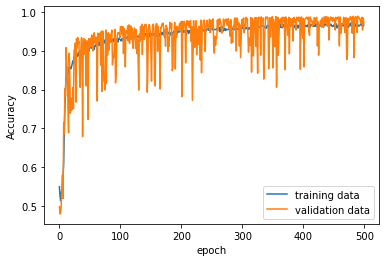

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9696


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9707


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]]
83/83 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9506072874493927
0.9840737636211232
0.9670510708401977


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]]
36/36 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]
 [ 0.1]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9471624266144814
0.9877551020408163
0.9670329670329669
